<a href="https://colab.research.google.com/github/caioassis-dev/books_data_analysis_with_pandas/blob/analiseExploratoriaDados/book_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import glob
import pandas as pd
from pyspark.sql import SparkSession
from google.colab import drive
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

caminho_csv = '/content/drive/MyDrive/dados_emprestimos'

# agrupando arquivos pela mesma extensão CSV.
csv_files = glob.glob(caminho_csv + "/*.csv")

# criando dataframe com os valores dos arquivos CSV e agrupando em um unico dataframe
df_list = (pd.read_csv(file) for file in csv_files)
big_df_not_clean   = pd.concat(df_list, ignore_index=True)


In [5]:
big_df_clear = big_df_not_clean.drop_duplicates()
big_df_clear

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,1772829,C002857,NaN,2014/07/01 08:20:40.476000000,2014/07/01 09:55:02.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
1,1772830,2011061496,NaN,2014/07/01 08:20:40.567000000,2014/07/01 08:26:05.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
2,1772831,2011065929,NaN,2014/07/01 08:20:40.675000000,2014/07/21 07:14:12.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
3,1772832,2013106666,NaN,2014/07/01 08:20:40.797000000,2014/07/01 08:26:23.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
4,1772833,2014000856,2014/07/16 14:40:34.640000000,2014/07/01 08:20:56.969000000,2014/07/25 10:22:13.000000000,2.013075e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2120319,2011078584,2016/01/27 09:15:22.535000000,2015/12/30 17:47:50.918000000,2016/02/29 20:42:14.000000000,2.321499e+06,DOCENTE
2258014,2120320,2013001416,2016/01/27 09:15:22.339000000,2015/12/30 17:47:51.256000000,2016/03/07 20:36:07.000000000,2.321499e+06,DOCENTE
2258015,2120321,2009047917,NaN,2015/12/30 17:47:51.580000000,2016/01/04 18:56:29.000000000,2.321499e+06,DOCENTE
2258016,2120322,2013063541,NaN,2015/12/30 17:50:17.469000000,2016/01/05 12:48:32.000000000,2.014027e+09,ALUNO DE GRADUAÇÃO


In [6]:
big_df_clear.head(10)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,1772829,C002857,NaN,2014/07/01 08:20:40.476000000,2014/07/01 09:55:02.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
1,1772830,2011061496,NaN,2014/07/01 08:20:40.567000000,2014/07/01 08:26:05.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
2,1772831,2011065929,NaN,2014/07/01 08:20:40.675000000,2014/07/21 07:14:12.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
3,1772832,2013106666,NaN,2014/07/01 08:20:40.797000000,2014/07/01 08:26:23.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO
4,1772833,2014000856,2014/07/16 14:40:34.640000000,2014/07/01 08:20:56.969000000,2014/07/25 10:22:13.000000000,2.013075e+09,ALUNO DE GRADUAÇÃO
5,1772834,2012051945,NaN,2014/07/01 08:27:43.538000000,2014/07/22 14:01:13.000000000,2.011043e+09,ALUNO DE GRADUAÇÃO
6,1772835,2010029765,2014/07/14 19:21:36.397000000,2014/07/01 08:29:14.915000000,2014/07/29 18:09:30.000000000,2.013033e+09,ALUNO DE GRADUAÇÃO
7,1772836,2009005827,NaN,2014/07/01 08:29:17.078000000,2014/07/01 08:30:34.000000000,2.009052e+09,ALUNO DE GRADUAÇÃO
8,1772837,2011061633,2014/07/14 19:21:36.336000000,2014/07/01 08:29:43.697000000,2014/07/29 18:09:40.000000000,2.013033e+09,ALUNO DE GRADUAÇÃO
9,1772838,2011009822,2014/07/14 21:29:48.702000000,2014/07/01 08:32:05.118000000,2014/07/29 12:44:09.000000000,2.013061e+09,ALUNO DE GRADUAÇÃO


In [7]:
# lendo dados de um arquivo com extensao Parquet
# criando uma sessao Spark
caminho_parquet = '/content/drive/MyDrive/dados_emprestimos/dados_exemplares.parquet'

# utilizei a biblioteca SPARK pois o ambiente que estou desenvolvendo nao estava aceitando a pyarrow e a fastparquet, ainda não sei
# se com elas a perfomance do script seria melhor.
spark = SparkSession.builder.appName("ParquetToDataFrame").getOrCreate()
df_parquet_spark = spark.read.parquet(caminho_parquet)

# criando dataframe com os valores dos arquivos Parquet
df_parquet = df_parquet_spark.toPandas()
spark.stop()

In [8]:
df_parquet

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema,index
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1,0
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1,2
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5,3
4,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15,5
...,...,...,...,...,...,...,...,...
546232,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231,568580
546233,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233,568581
546234,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234,568582
546235,1353475,2019013451,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,764,268235,568583


In [9]:
df_parquet.value_counts()

id_exemplar  codigo_barras  colecao            biblioteca                                             status_material  localizacao  registro_sistema  index 
3            L000001        Acervo Circulante  Biblioteca Central Zila Mamede                         ESPECIAL         638          1                 2         1
1070480      2013071582     Acervo Circulante  Biblioteca Setorial do Centro Ciências da Saúde - CCS  REGULAR          340          200283            427713    1
1070506      2013077711     Acervo Circulante  Biblioteca Central Zila Mamede                         REGULAR          354          200288            427722    1
1070505      2013077710     Acervo Circulante  Biblioteca Central Zila Mamede                         REGULAR          327          200288            427723    1
1070504      2013077807     Acervo Circulante  Biblioteca Central Zila Mamede                         REGULAR          348          200286            427720    1
                                 

In [10]:
emprestimos_total = big_df_clear.merge(df_parquet)
emprestimos_total

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,index
0,1772830,2011061496,NaN,2014/07/01 08:20:40.567000000,2014/07/01 08:26:05.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,172225,361062
1,1779056,2011061496,NaN,2014/07/21 13:51:44.180000000,2014/07/21 16:42:17.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,172225,361062
2,1493744,2011061496,NaN,2013/04/30 17:30:24.321000000,2013/05/02 08:10:25.000000000,2.008040e+09,ALUNO DE GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,172225,361062
3,2308260,2011061496,2016/10/25 19:34:22.088000000,2016/09/27 17:00:20.908000000,2016/12/23 09:01:30.000000000,2.016400e+10,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,172225,361062
4,1585795,2011061496,2013/10/07 10:45:35.577000000,2013/09/06 16:05:52.456000000,2013/11/07 20:03:41.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,172225,361062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2120270,L165799,NaN,2015/12/30 12:51:28.140000000,2016/01/04 10:53:20.000000000,2.014123e+09,ALUNO DE PÓS-GRADUAÇÃO,74072,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,618,25896,67764
2072518,2120273,2014027017,NaN,2015/12/30 12:56:56.617000000,2016/01/04 10:53:08.000000000,2.014123e+09,ALUNO DE PÓS-GRADUAÇÃO,1171137,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,61,217260,481190
2072519,2120305,2015030629,NaN,2015/12/30 16:20:36.416000000,2016/01/04 14:56:05.000000000,2.011058e+09,ALUNO DE GRADUAÇÃO,1200316,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,31,225600,497749
2072520,2120306,2015031278,NaN,2015/12/30 16:20:36.647000000,2016/01/04 14:56:21.000000000,2.011058e+09,ALUNO DE GRADUAÇÃO,1207685,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,523,226963,500913


In [11]:
# funcao para adicionar "nomes" conforme códigos da CDU

def mapear_cdu(cdu):
    categorias = {
        range(0, 100): 'Generalidades',
        range(100, 200): 'Filosofia e psicologia',
        range(200, 300): 'Religião',
        range(300, 400): 'Ciências sociais',
        range(400, 500): 'Classe vaga',
        range(500, 600): 'Matemática e ciências naturais',
        range(600, 700): 'Ciências aplicadas',
        range(700, 800): 'Belas artes',
        range(800, 900): 'Linguagem',
        range(900, 1000): 'Geografia. Biografia. História.'
    }

    for intervalo, categoria in categorias.items():
        if cdu in intervalo:
            return categoria

emprestimos_total['CDU_geral'] = emprestimos_total['localizacao'].apply(mapear_cdu)


In [12]:
emprestimos_total['localizacao']

0          309
1          309
2          309
3          309
4          309
          ... 
2072517    618
2072518     61
2072519     31
2072520    523
2072521    318
Name: localizacao, Length: 2072522, dtype: int64

In [13]:
emprestimos_total['CDU_geral']

0                        Ciências sociais
1                        Ciências sociais
2                        Ciências sociais
3                        Ciências sociais
4                        Ciências sociais
                        ...              
2072517                Ciências aplicadas
2072518                     Generalidades
2072519                     Generalidades
2072520    Matemática e ciências naturais
2072521                  Ciências sociais
Name: CDU_geral, Length: 2072522, dtype: object

In [14]:
emprestimos_total.drop(columns=['registro_sistema'],inplace=True)
emprestimos_total

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,index,CDU_geral
0,1772830,2011061496,NaN,2014/07/01 08:20:40.567000000,2014/07/01 08:26:05.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
1,1779056,2011061496,NaN,2014/07/21 13:51:44.180000000,2014/07/21 16:42:17.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
2,1493744,2011061496,NaN,2013/04/30 17:30:24.321000000,2013/05/02 08:10:25.000000000,2.008040e+09,ALUNO DE GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
3,2308260,2011061496,2016/10/25 19:34:22.088000000,2016/09/27 17:00:20.908000000,2016/12/23 09:01:30.000000000,2.016400e+10,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
4,1585795,2011061496,2013/10/07 10:45:35.577000000,2013/09/06 16:05:52.456000000,2013/11/07 20:03:41.000000000,2.013124e+09,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2120270,L165799,NaN,2015/12/30 12:51:28.140000000,2016/01/04 10:53:20.000000000,2.014123e+09,ALUNO DE PÓS-GRADUAÇÃO,74072,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,618,67764,Ciências aplicadas
2072518,2120273,2014027017,NaN,2015/12/30 12:56:56.617000000,2016/01/04 10:53:08.000000000,2.014123e+09,ALUNO DE PÓS-GRADUAÇÃO,1171137,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,61,481190,Generalidades
2072519,2120305,2015030629,NaN,2015/12/30 16:20:36.416000000,2016/01/04 14:56:05.000000000,2.011058e+09,ALUNO DE GRADUAÇÃO,1200316,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,31,497749,Generalidades
2072520,2120306,2015031278,NaN,2015/12/30 16:20:36.647000000,2016/01/04 14:56:21.000000000,2.011058e+09,ALUNO DE GRADUAÇÃO,1207685,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,523,500913,Matemática e ciências naturais


In [15]:
# como podemos notar não existe mais a coluna 'registro_sistema' , pois foi retirada com o Drop
emprestimos_total.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'index', 'CDU_geral'],
      dtype='object')

In [16]:
emprestimos_total['matricula_ou_siape'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 2072522 entries, 0 to 2072521
Series name: matricula_ou_siape
Non-Null Count    Dtype  
--------------    -----  
2069629 non-null  float64
dtypes: float64(1)
memory usage: 15.8 MB


In [17]:
emprestimos_total['matricula_ou_siape']

0          2.013124e+09
1          2.013124e+09
2          2.008040e+09
3          2.016400e+10
4          2.013124e+09
               ...     
2072517    2.014123e+09
2072518    2.014123e+09
2072519    2.011058e+09
2072520    2.011058e+09
2072521    2.014027e+09
Name: matricula_ou_siape, Length: 2072522, dtype: float64

In [18]:
# alterando o formato da coluna 'matricula_ou_siape' para string, pois será necessário nos próximos passos das anaálises.

emprestimos_total['matricula_ou_siape'] = emprestimos_total['matricula_ou_siape'].astype('string')


In [19]:
emprestimos_total['matricula_ou_siape'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2072522 entries, 0 to 2072521
Series name: matricula_ou_siape
Non-Null Count    Dtype 
--------------    ----- 
2069629 non-null  string
dtypes: string(1)
memory usage: 15.8 MB


In [20]:
emprestimos_total.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'index', 'CDU_geral'],
      dtype='object')

In [21]:
emprestimos_total.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,index,CDU_geral
0,1772830,2011061496,NaN,2014/07/01 08:20:40.567000000,2014/07/01 08:26:05.000000000,2013124297.0,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
1,1779056,2011061496,NaN,2014/07/21 13:51:44.180000000,2014/07/21 16:42:17.000000000,2013124090.0,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
2,1493744,2011061496,NaN,2013/04/30 17:30:24.321000000,2013/05/02 08:10:25.000000000,2008039935.0,ALUNO DE GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
3,2308260,2011061496,2016/10/25 19:34:22.088000000,2016/09/27 17:00:20.908000000,2016/12/23 09:01:30.000000000,20164000856.0,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais
4,1585795,2011061496,2013/10/07 10:45:35.577000000,2013/09/06 16:05:52.456000000,2013/11/07 20:03:41.000000000,2013124107.0,ALUNO DE PÓS-GRADUAÇÃO,950789,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,309,361062,Ciências sociais


In [22]:
emprestimos = len(emprestimos_total['id_emprestimo'].drop_duplicates())

emprestimos_data = pd.DataFrame(emprestimos_total['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data

,data,quantidade
0,2015-06-02 17:56:18.917,3
1,2017-04-20 21:07:44.036,3
2,2015-08-18 19:11:08.653,3
3,2017-09-20 16:47:09.285,3
4,2015-05-05 20:37:19.551,3
...,...,...
2068686,2014-10-06 09:26:13.356,1
2068687,2014-09-08 11:18:39.468,1
2068688,2014-08-13 12:17:18.440,1
2068689,2011-11-18 20:35:58.654,1


In [23]:
# Convertendo a coluna de data para o formato numérico (por exemplo, dias desde uma data de referência)
emprestimos_data['data_numerica'] = emprestimos_data['data'].sub(emprestimos_data['data'].min()).dt.days

# Agrupando os dados pela coluna 'ano' e somando a coluna 'quantidade'
emprestimos_por_ano = emprestimos_data.groupby(by=emprestimos_data['data'].dt.year)['quantidade'].sum()
emprestimos_por_ano.index.name = 'ano'
emprestimos_por_ano


ano
2010    161394
2011    196390
2012    221365
2013    234749
2014    219189
2015    213582
2016    215900
2017    218462
2018    194080
2019    171801
2020     25610
Name: quantidade, dtype: int64

In [24]:
emprestimos_por_ano.reset_index()

,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


In [26]:
df_emprestimos = pd.DataFrame(emprestimos_por_ano)

In [27]:
df_emprestimos.reset_index(inplace=True)

In [28]:
df_emprestimos

,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


In [29]:
# adicionando configuracoes para o grafico
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font_scale=1.3,
              rc={"figure.figsize":(15,8)})

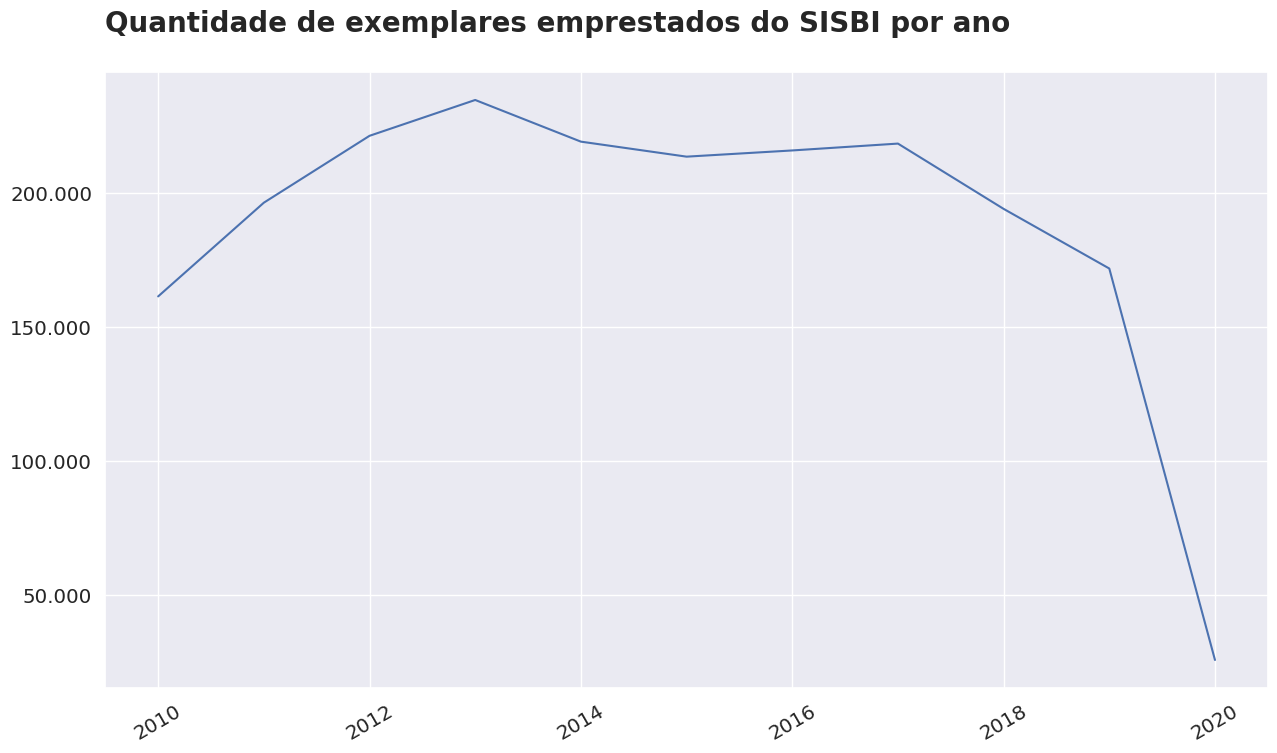

In [30]:
# quantidade total de exemplares emprestados por cada ano, grafico em linhas

ax = sns.lineplot(data=df_emprestimos,x='ano',y='quantidade')
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_title('Quantidade de exemplares emprestados do SISBI por ano'+'\n',size=20,loc='left',weight='bold')
ax=ax



In [31]:
# tabela com a quantidade total de exemplares por mes
# Convertendo a coluna de data para o formato numérico (por exemplo, dias desde uma data de referência)
# a linha abaixo foi feita em algumas linhas acima, pois nao era possivel somar um datetime, por isso foi convertido para numeros.
# emprestimos_data['data_numerica'] = emprestimos_data['data'].sub(emprestimos_data['data'].min()).dt.days

emprestimos_por_mes = emprestimos_data.groupby(by=emprestimos_data['data'].dt.month)['quantidade'].sum()
emprestimos_por_mes.index.name = 'mes'
emprestimos_por_mes


mes
1      67514
2     210200
3     252185
4     208725
5     202530
6     138123
7     123790
8     232793
9     208234
10    188410
11    164222
12     75796
Name: quantidade, dtype: int64

In [32]:
# modificar a legenda dos numero por nome do mês

dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)
emprestimos_por_mes

mes
Jan     67514
Fev    210200
Mar    252185
Abr    208725
Mai    202530
Jun    138123
Jul    123790
Ago    232793
Set    208234
Out    188410
Nov    164222
Dez     75796
Name: quantidade, dtype: int64

In [33]:
emprestimos_por_mes_df = pd.DataFrame(emprestimos_por_mes)

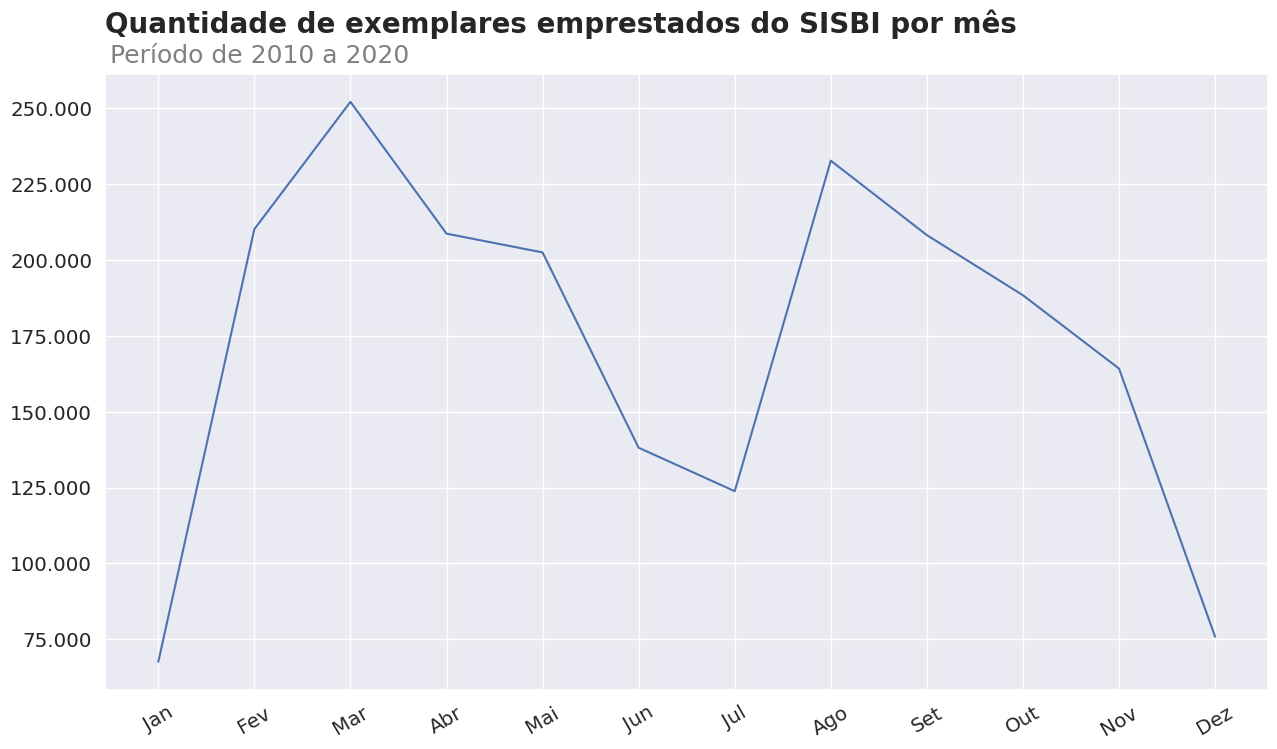

In [34]:
# criar o grafico de quantidade de emprestimos realizado a cada mês

ax = sns.lineplot(data=emprestimos_por_mes_df,x='mes',y='quantidade')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_title("Quantidade de exemplares emprestados do SISBI por mês"+"\n", size=20,loc="left",weight="bold")
ax.text(s="Período de 2010 a 2020",x=-0.5,y=265000, fontsize=18, ha="left",color='gray')
ax = ax

In [35]:
emprestimos_data.data

0         2015-06-02 17:56:18.917
1         2017-04-20 21:07:44.036
2         2015-08-18 19:11:08.653
3         2017-09-20 16:47:09.285
4         2015-05-05 20:37:19.551
                    ...          
2068686   2014-10-06 09:26:13.356
2068687   2014-09-08 11:18:39.468
2068688   2014-08-13 12:17:18.440
2068689   2011-11-18 20:35:58.654
2068690   2015-12-30 17:50:17.469
Name: data, Length: 2068691, dtype: datetime64[ns]

In [36]:
# horario com maior quantidade de emprestimos ao longo do dia, grafico em barras
emprestimos_hora_dia = emprestimos_data.groupby(by=emprestimos_data['data'].dt.hour)['quantidade'].sum()
emprestimos_hora_dia.index.name = 'horas'
emprestimos_hora_dia = emprestimos_hora_dia.reset_index()
emprestimos_hora_dia

,horas,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


In [37]:
emprestimos_hora_dia = emprestimos_hora_dia.sort_values(ascending=True, by='quantidade')

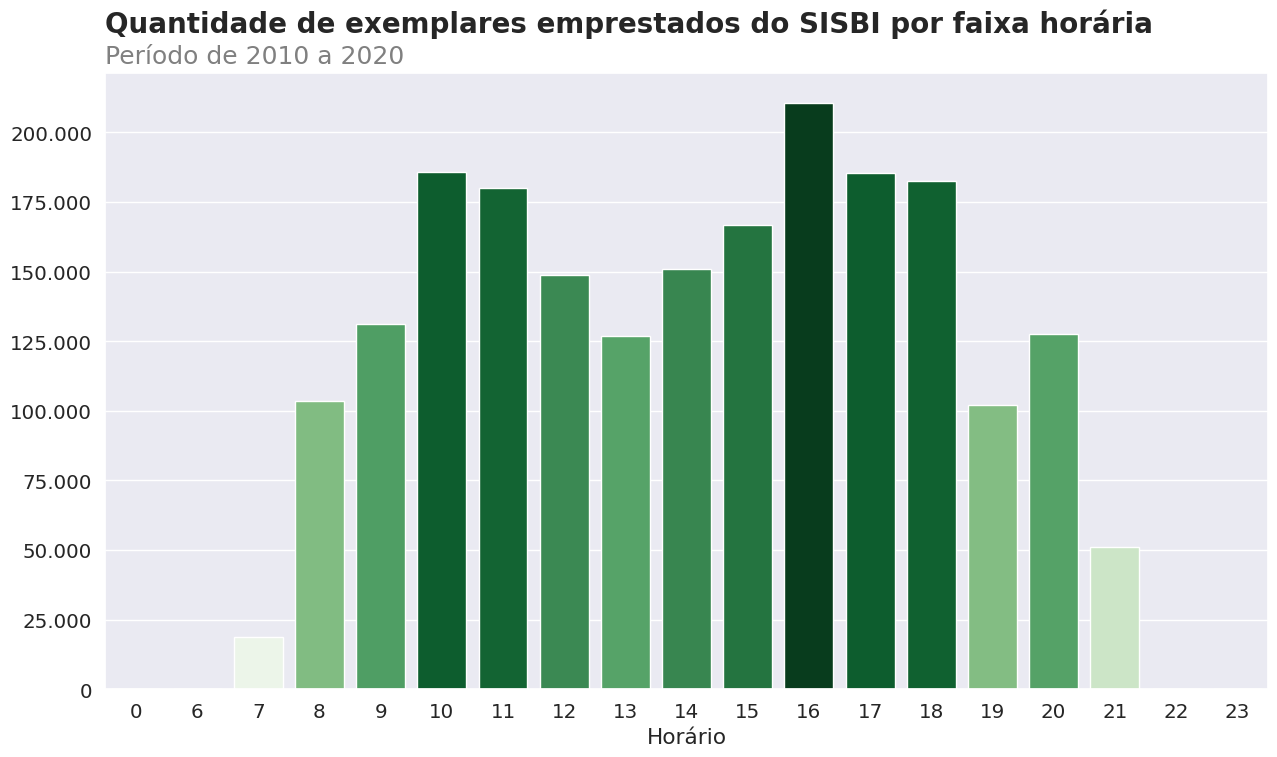

In [38]:
ax = sns.barplot(data=emprestimos_hora_dia, y='quantidade', x='horas', palette='Greens',hue='quantidade',dodge=False)
plt.legend([],[],frameon=False)
ax.set(xlabel='Horário',ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_title("Quantidade de exemplares emprestados do SISBI por faixa horária"+"\n",size=20,loc='left',weight='bold')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=225000,fontsize=18, ha='left',color='gray')
ax=ax



In [39]:
emprestimos_total['data_emprestimo'] = pd.to_datetime(emprestimos_total['data_emprestimo'])

In [40]:
emprestimos_total['tipo_vinculo_usuario'].unique()

array(['ALUNO DE PÓS-GRADUAÇÃO', 'ALUNO DE GRADUAÇÃO',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE',
       'ALUNO MÉDIO/TÉCNICO', 'DOCENTE EXTERNO', 'USUÁRIO EXTERNO',
       'OUTROS'], dtype=object)

In [41]:
emprestimos_total['colecao'].unique()


array(['Acervo Circulante', 'Multimeios', 'Publicações de Autores do RN',
       'Obras de Referência', 'Literatura de Cordel',
       'Publicações da UFRN', 'Monografias', 'Folhetos', 'Dissertações',
       'Coleção Mossoroense', 'Eventos', 'Teses', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas', 'Trabalho Acadêmico',
       'Obras Raras'], dtype=object)

In [42]:
emprestimos_total['biblioteca'].unique()


array(['Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos',
       'Biblioteca Central Zila Mamede',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - \xadCERES\xad - Caicó',
       'Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial Prof. Horácio Nicolas Soli

In [43]:
emprestimos_total['CDU_geral'].unique()


array(['Ciências sociais', 'Filosofia e psicologia', 'Ciências aplicadas',
       'Religião', 'Generalidades', 'Matemática e ciências naturais',
       'Linguagem', 'Belas artes', 'Geografia. Biografia. História.'],
      dtype=object)

In [44]:
emprestimos_total['tipo_vinculo_usuario']

0          ALUNO DE PÓS-GRADUAÇÃO
1          ALUNO DE PÓS-GRADUAÇÃO
2              ALUNO DE GRADUAÇÃO
3          ALUNO DE PÓS-GRADUAÇÃO
4          ALUNO DE PÓS-GRADUAÇÃO
                    ...          
2072517    ALUNO DE PÓS-GRADUAÇÃO
2072518    ALUNO DE PÓS-GRADUAÇÃO
2072519        ALUNO DE GRADUAÇÃO
2072520        ALUNO DE GRADUAÇÃO
2072521        ALUNO DE GRADUAÇÃO
Name: tipo_vinculo_usuario, Length: 2072522, dtype: object

In [45]:
# criando uma funcao que irá gerar uma tabela de frequência com percentuais de acordo com a variável passada.
# com essa funcao conseguimos gerar a % ou seja a frequencia para cada variavel que foi passada, baseando pela coluna quantidade para fazer o calculo

def gera_tabela_frequencia(dado):

  dataframe = pd.DataFrame(emprestimos_total[dado].value_counts())
  dataframe.columns = ['quantidade']
  dataframe['percentual'] = round((dataframe.quantidade / dataframe.quantidade.sum())*100,1)

  return dataframe


In [46]:
gera_tabela_frequencia('tipo_vinculo_usuario')


,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


In [47]:
gera_tabela_frequencia('colecao')


,quantidade,percentual
colecao,,
Acervo Circulante,2053120,99.1
Multimeios,7954,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1954,0.1
Publicações de Autores do RN,866,0.0
Publicações da UFRN,764,0.0
Teses,714,0.0
Folhetos,271,0.0


In [48]:
gera_tabela_frequencia('biblioteca')


,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4


In [49]:
gera_tabela_frequencia('CDU_geral')


,quantidade,percentual
CDU_geral,,
Ciências aplicadas,1425473,68.8
Ciências sociais,369536,17.8
Matemática e ciências naturais,68744,3.3
Generalidades,62521,3.0
Religião,62295,3.0
Filosofia e psicologia,60563,2.9
Geografia. Biografia. História.,7989,0.4
Belas artes,7911,0.4
Linguagem,7490,0.4


In [85]:
# verificando apenas os alunos por tipo
def gera_valor_mes_ano(string_tipo_aluno):

  alunos_filtrados = emprestimos_total.query(f'tipo_vinculo_usuario == "{string_tipo_aluno}"')
  alunos_filtrados.colecao.value_counts()
  alunos_filtrados_acervo_circulante = alunos_filtrados.query('colecao == "Acervo Circulante"')
  alunos_filtrados_acervo_circulante = pd.DataFrame(alunos_filtrados_acervo_circulante)
  alunos_filtrados_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_filtrados_acervo_circulante['data_emprestimo'])
  alunos_filtrados_acervo_circulante['ano'] = alunos_filtrados_acervo_circulante['data_emprestimo'].dt.year
  alunos_filtrados_acervo_circulante['mes'] = alunos_filtrados_acervo_circulante['data_emprestimo'].dt.month
  alunos_filtrados_acervo_circulante = alunos_filtrados_acervo_circulante.loc[:,['ano','mes']]
  alunos_filtrados_acervo_circulante = alunos_filtrados_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
  alunos_filtrados_acervo_circulante

  return alunos_filtrados,alunos_filtrados_acervo_circulante

In [86]:
# utilizando o boxplot para melhorar a analise de alguns itens

def gera_box_plot(dataframe,x,y,titulo,subtitulo):
  # gerador de grafico estilo boxplot
  # x = valor do eixo x
  # y = valor do eixo y
  # titulo = titulo do grafico
  # subtitulo = subtitulo do grafico

  sns.set_theme(style="darkgrid", palette='Greens',font_scale=1.3)
  plt.figure(figsize=(16,10))

  ax = sns.boxplot(y= y, x= x, data= dataframe,color='green')
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))


  plt.ylim(0,max(dataframe[y])*1.1)
  plt.xlabel(None)
  plt.ylabel(None)

  ax.set_title(titulo+"\n",size=20,loc='left',weight='bold')
  ax.text(s=subtitulo,x=-0.5,y=max(dataframe[y])*1.11,fontsize=18, ha='left',color='gray')






In [88]:
alunos_filtrados,alunos_filtrados_acervo_circulante = gera_valor_mes_ano("ALUNO DE GRADUAÇÃO")
alunos_filtrados.colecao.value_counts()

ALUNO DE GRADUAÇÃO


colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [89]:
alunos_filtrados_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


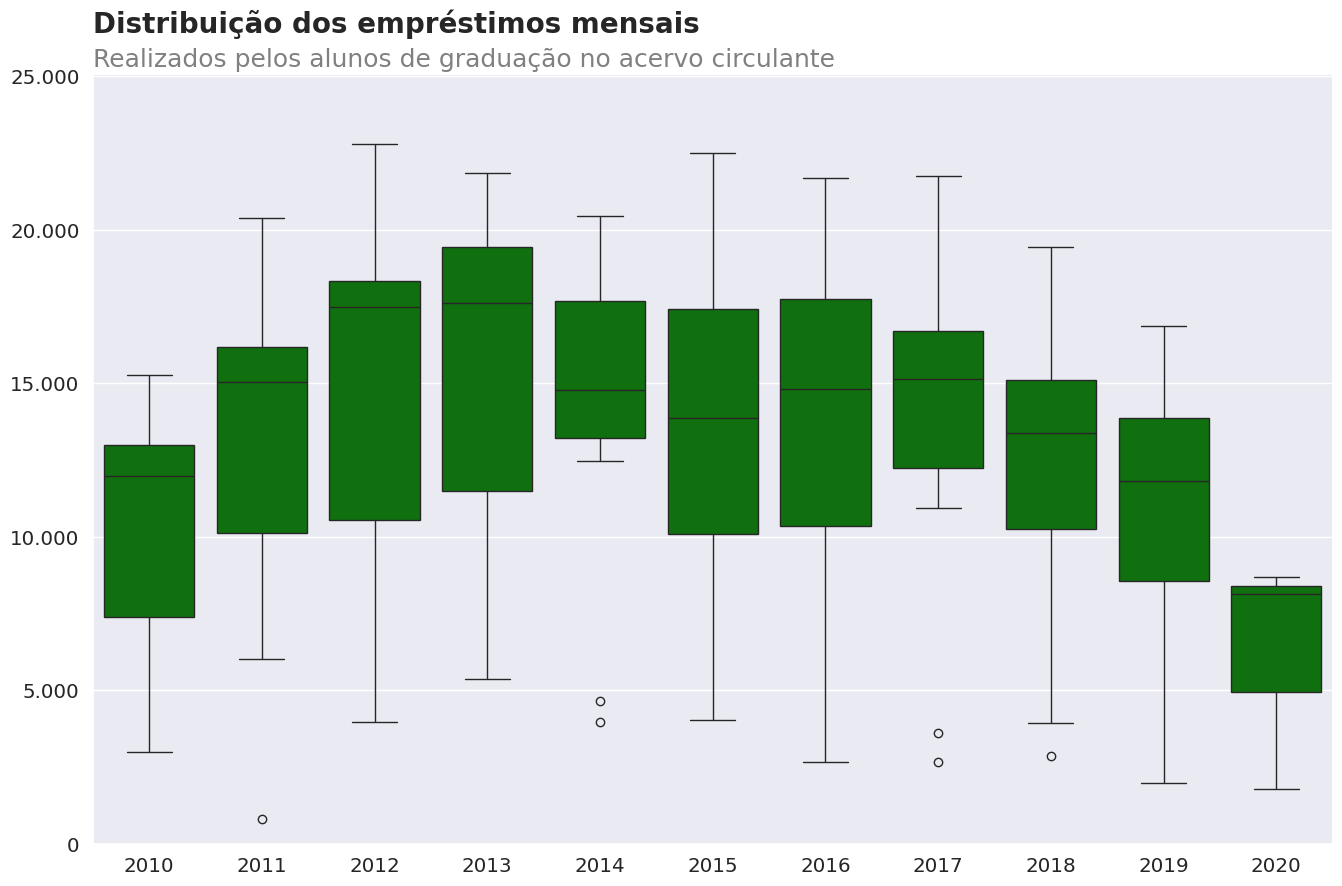

In [90]:
gera_box_plot(alunos_filtrados_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de graduação no acervo circulante')


In [91]:
emprestimos_total['tipo_vinculo_usuario'].unique()

array(['ALUNO DE PÓS-GRADUAÇÃO', 'ALUNO DE GRADUAÇÃO',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE',
       'ALUNO MÉDIO/TÉCNICO', 'DOCENTE EXTERNO', 'USUÁRIO EXTERNO',
       'OUTROS'], dtype=object)

In [94]:
# verificando apenas os alunos de pós graduação e sua quantidade
alunos_filtrados,alunos_filtrados_acervo_circulante = gera_valor_mes_ano("ALUNO DE PÓS-GRADUAÇÃO")
alunos_filtrados.colecao.value_counts()

ALUNO DE PÓS-GRADUAÇÃO


colecao
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

In [95]:
alunos_filtrados_acervo_circulante

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


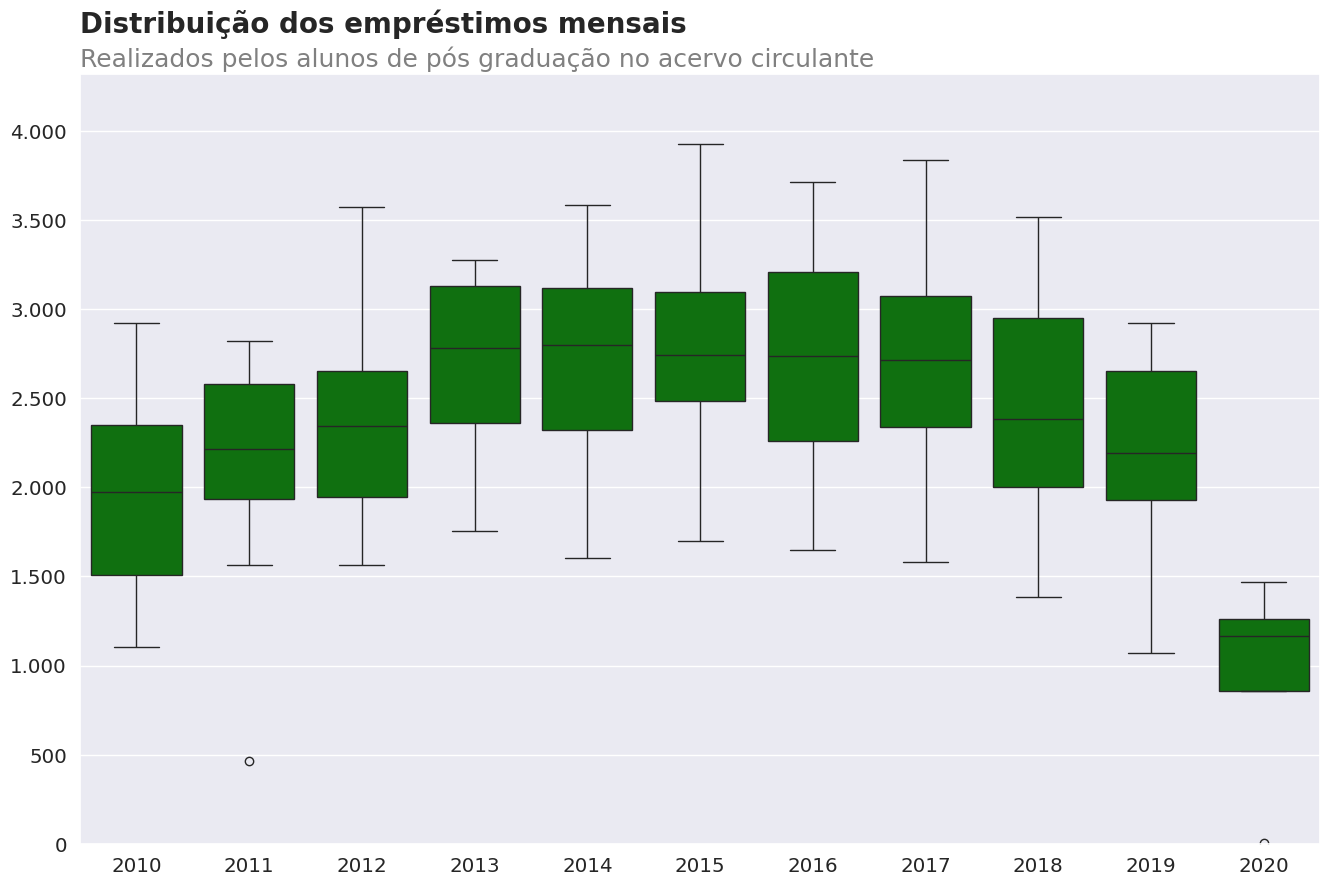

In [97]:
gera_box_plot(alunos_filtrados_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de pós graduação no acervo circulante')


In [50]:
# Tipo de vínculo,Coleção,Biblioteca,Classificação geral da CDU
# verificar valores unicos dentro de cada variavel, assim conseguimos saber todos sem repetir
# verificar quais valores se repetem mais e quantidade que repete
# Gere uma tabela de frequência e com o percentual para cada variável.

